In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

%matplotlib inline
!pwd

/c/HDD/Courses/gitRepos/MNIST-CNN-TF/MNIST-CNN-TF


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)


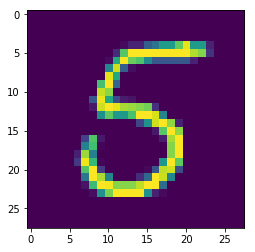

In [3]:
plt.imshow(x_train[768,:,:])
print(type(x_train))
print(x_train.shape)
print(y_train.shape)

#reshaping to add the channel dim
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1], x_train.shape[2], 1))
# y_train = y_train.reshape((y_train.shape[0],y_train.shape[1], y_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1], x_test.shape[2], 1))
# y_test = y_test.reshape((y_test.shape[0],y_test.shape[1], y_test.shape[2], 1))

print(x_train.shape)

In [4]:
with tf.device('/gpu:0'):
    model = tf.keras.models.Sequential([
#         tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Conv2D(kernel_size=[5,5], filters=32, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(kernel_size=[5,5], filters=64, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    tensorboard = TensorBoard(log_dir=r"logs\{}".format(time()))

    model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=512, epochs=5, validation_split=0.0, callbacks=[tensorboard])
    model.evaluate(x_test, y_test)

W0705 02:48:22.043648 36652 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3162 - accuracy: 0.9071
Epoch 2/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0620 - accuracy: 0.9808s - loss: 0.0705 - accuracy: 0.97 - ETA
Epoch 3/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0416 - accuracy: 0.9873 0s - loss: 0.0417 - accuracy: 0.98
Epoch 4/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0319 - accuracy: 0.9901s - loss: 0.0328 - ac
Epoch 5/5
10000/10000 [==============================] - 0s 49us/sample - loss: 0.0255 - accuracy: 0.9911


In [5]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(v_xs, v_ys):
    cls_true = v_ys
    cls_pred = np.argmax(model.predict(v_xs), axis=1).T
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    
    plt.figure()
#     plt.subplot(121)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Print the confusion matrix as text.
#     print(cm)
    # Plot the confusion matrix as an image.

10000/10000 [==============================] - 0s 41us/sample
prediction for this image: 8


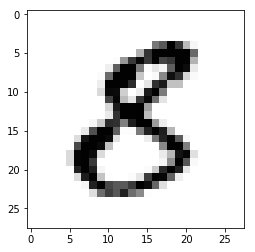

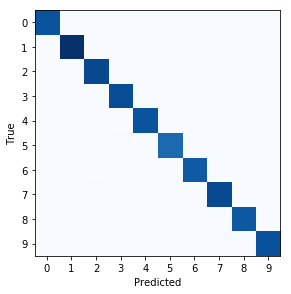

In [6]:
img_no = 1234

plt.figure()
plt.imshow(x_test[img_no,:,:,0], cmap='Greys')
pred = np.argmax(model.predict(x_test, batch_size=None, verbose=1), axis=1)[img_no]
print("prediction for this image: {}".format(pred))

print_confusion_matrix(x_test, y_test.reshape((-1, 1)))